In [21]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from librosa.effects import harmonic
from collections import Counter
from music21 import note , duration , environment

In [22]:
us = environment.UserSettings()
us['musicxmlPath'] = r'C://Program Files//MuseScore 4//bin//MuseScore4.exe'
us['musescoreDirectPNGPath'] = r'C://Program Files//MuseScore 4//bin//MuseScore4.exe'
us['lilypondPath'] = r'C://Music2leadsheet//lilypond-2.24.3//bin//lilypond.exe'

In [23]:
filename = input().replace("\\" , "/")
print(filename)
os.system(f"demucs -d cpu {filename}")

1

In [24]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
audio_file = r'C:\Music2leadsheet\separated\htdemucs\TEST\vocals.wav'  # Replace with the path to your audio file
y, sr = librosa.load(audio_file)

# Compute onset strength
onset_env = librosa.onset.onset_strength(y=y, sr=sr)

# Plot the onset graph
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.plot(librosa.times_like(onset_env), onset_env, label='Onset Strength')
plt.title('Onset Strength and Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Print the onset list
onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env, sr=sr)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)
print("Onset times (in seconds):", onset_times)


AttributeError: module 'soundfile' has no attribute 'SoundFileRuntimeError'

In [25]:
# define

onset_results = []
# Dictionary of note frequencies
note_frequencies = {
    "A3": 220.0,
    "A#3": 233.1,
    "B3": 246.9,
    "C4": 261.6,
    "C#4": 277.2,
    "D4": 293.7,
    "D#4": 311.1,
    "E4": 329.6,
    "F4": 349.2,
    "F#4": 370.0,
    "G4": 392.0,
    "G#4": 415.3,
    "A4": 440.0
}

# Function to find the closest note to a given frequency
def find_closest_note(frequency):
    return min(note_frequencies.keys(), key=lambda x: abs(note_frequencies[x] - frequency))

# Iterate over onset times
for i in range(len(onset_times) - 1):
    start_time = onset_times[i]
    end_time = onset_times[i + 1]

    # Extract the signal within the onset interval
    onset_interval = y[int(sr * start_time):int(sr * end_time)]

    # Perform FFT
    fft_result = np.fft.fft(onset_interval)
    freqs = np.fft.fftfreq(len(onset_interval), 1/sr)
    freqs = freqs[:len(freqs)//2]
    fft_result = 2.0/len(onset_interval) * np.abs(fft_result[:len(onset_interval)//2])

    # Find the dominant frequency
    dominant_freq_index = np.argmax(fft_result)
    dominant_freq = freqs[dominant_freq_index]

    # Convert frequency to note
    detected_note = find_closest_note(dominant_freq)

    # Calculate duration in seconds
    duration = end_time - start_time

    # Print the results
    print(f"Interval {i + 1}: Start Time: {start_time:.2f}s, End Time: {end_time:.2f}s, "
          f"Detected Note: {detected_note}, Dominant Frequency: {dominant_freq:.2f} Hz, Duration: {duration:.2f}s")
    
    # Save results in a dictionary
    onset_dict = {
        'start_time': start_time,
        'end_time': end_time,
        'detected_note': detected_note,
        'dominant_frequency': dominant_freq,
        'duration': duration
    }

    # Append the dictionary to the list
    onset_results.append(onset_dict)

# Print or use the list of dictionaries as needed
for result in onset_results:
    print(result)

NameError: name 'onset_times' is not defined

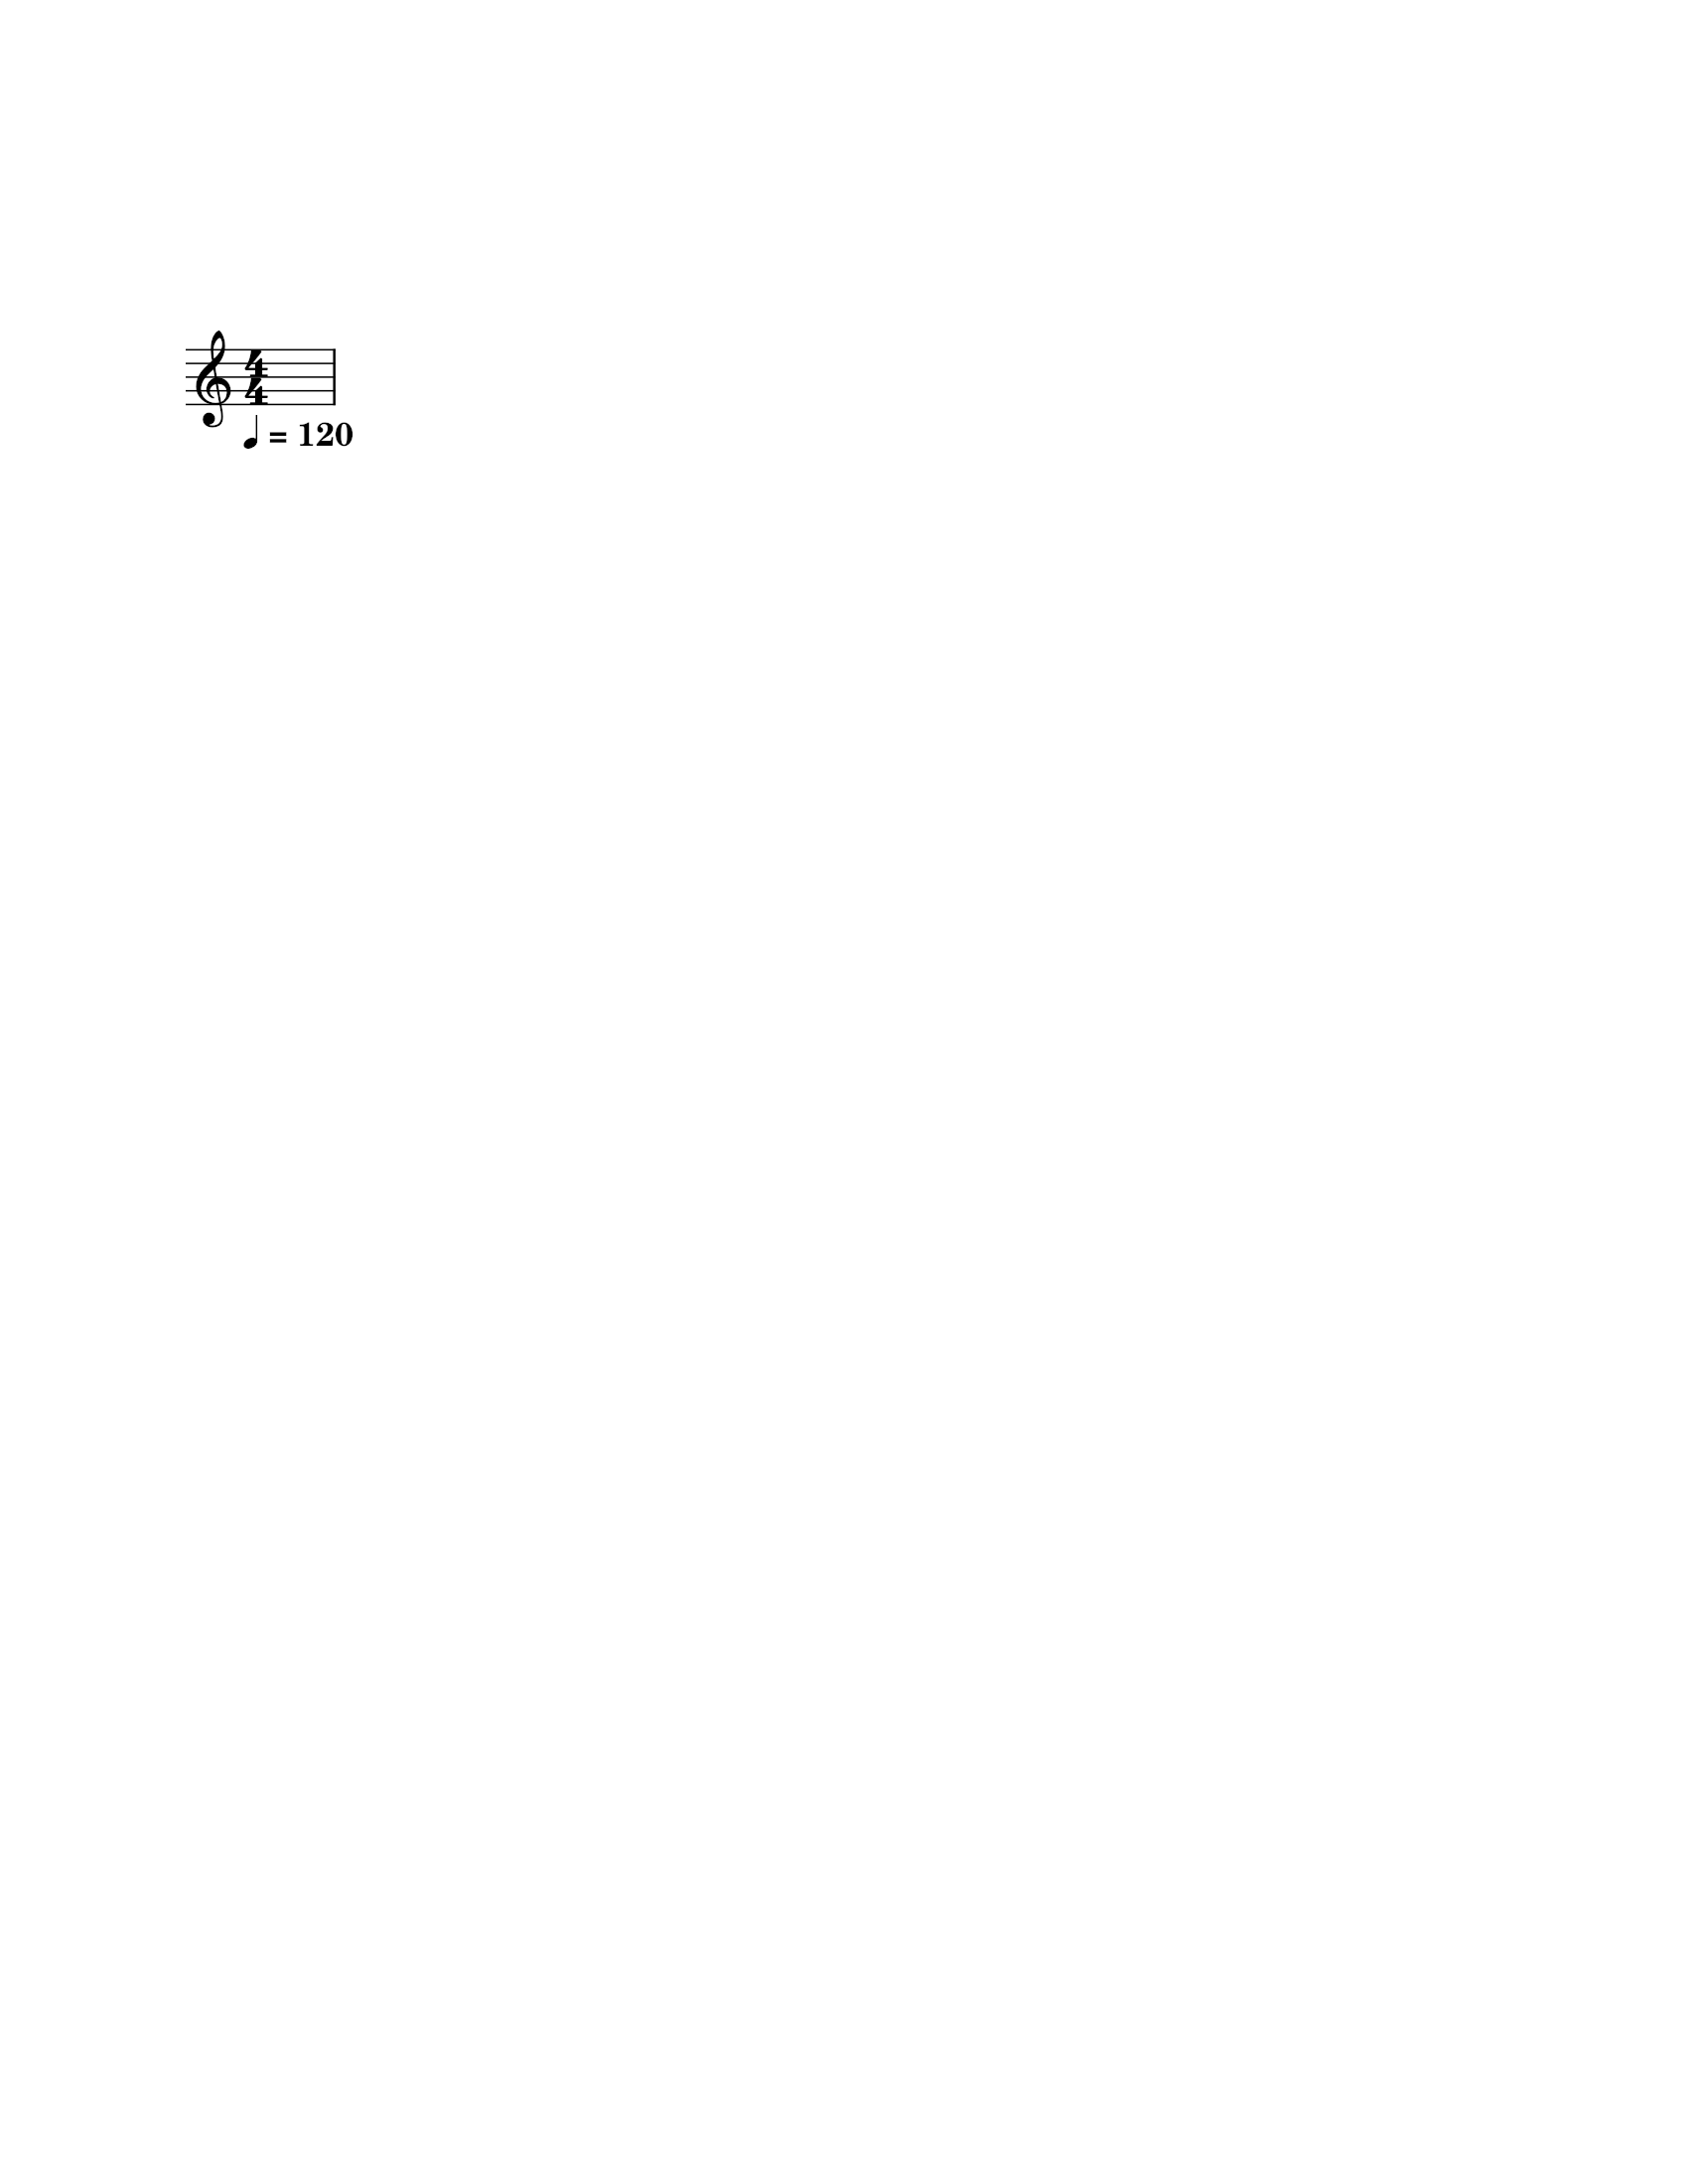

WindowsPath('c:/Music2leadsheet/output_leadsheet.xml')

In [28]:
from music21 import stream, meter, note, tempo

# define
Sheet_name = ""
composer = ""

# Function to convert a note name to a music21 note object
def note_name_to_object(note_name, duration):
    return note.Note(note_name, quarterLength=duration)

# Function to round duration to the nearest subdivision
def round_duration(duration, subdivision=16):
    return round(duration * subdivision) / subdivision

# Function to create a leadsheet from the onset results
def create_leadsheet(onset_results , sheet_name="Generated Leadsheet" , composer="Generate APP"):
    # Create a stream for the leadsheet
    leadsheet_stream = stream.Score()

    # Add metadata to the leadsheet
    leadsheet_stream.metadata = {
        'title': sheet_name,
        'composer': composer
    }

    # Create a part for the leadsheet
    part = stream.Part()

    # Add time signature and tempo
    part.append(meter.TimeSignature('4/4'))
    part.append(tempo.MetronomeMark(number=120))  # Adjust the tempo as needed

    # Iterate over onset results and add notes to the part
    for result in onset_results:
        # Round the duration to the nearest subdivision
        rounded_duration = round_duration(result['duration'])
        note_obj = note_name_to_object(result['detected_note'], rounded_duration)
        part.append(note_obj)

    # Add the part to the leadsheet stream
    leadsheet_stream.append(part)

    return leadsheet_stream

# Create leadsheet from onset results
leadsheet = create_leadsheet(onset_results)

# Show or save the leadsheet
leadsheet.show()
# leadsheet.write('musicxml')
leadsheet.write('musicxml', 'output_leadsheet.xml')  # Uncomment to save as MusicXML


# Final Function

In [27]:
# setup library
import os
import librosa
import librosa.display
import numpy as np
from music21 import note, environment , stream, meter, note, tempo
from music21 import stream, meter, note, tempo, metadata


# setup environment
us = environment.UserSettings()
us['musicxmlPath'] = r'C://Program Files//MuseScore 4//bin//MuseScore4.exe'
us['musescoreDirectPNGPath'] = r'C://Program Files//MuseScore 4//bin//MuseScore4.exe'
us['lilypondPath'] = r'C://Music2leadsheet//lilypond-2.24.3//bin//lilypond.exe'

note_frequencies = {
    "A3": 220.0,
    "A#3": 233.1,
    "B3": 246.9,
    "C4": 261.6,
    "C#4": 277.2,
    "D4": 293.7,
    "D#4": 311.1,
    "E4": 329.6,
    "F4": 349.2,
    "F#4": 370.0,
    "G4": 392.0,
    "G#4": 415.3,
    "A4": 440.0
}

def find_closest_note(frequency):
    return min(note_frequencies.keys(), key=lambda x: abs(note_frequencies[x] - frequency))

def note_name_to_object(note_name, duration):
    return note.Note(note_name, quarterLength=duration)

def round_duration(duration, subdivision=16):
    return round(duration * subdivision) / subdivision

def create_leadsheet(onset_results , sheet_name="Generated Leadsheet" , composer="Generate APP"):
    # Create a stream for the leadsheet
    leadsheet_stream = stream.Score()
    # Create a part for the leadsheet
    part = stream.Part()

    # Add time signature and tempo
    part.append(meter.TimeSignature('4/4'))
    part.append(tempo.MetronomeMark(number=120))  # Adjust the tempo as needed

    # Iterate over onset results and add notes to the part
    for result in onset_results:
        # Round the duration to the nearest subdivision
        rounded_duration = round_duration(result['duration'])
        note_obj = note_name_to_object(result['detected_note'], rounded_duration)
        part.append(note_obj)

    # Add the part to the leadsheet stream
    leadsheet_stream.append(part)
    leadsheet_stream.insert(0, metadata.Metadata())
    leadsheet_stream.metadata.composer = composer
    leadsheet_stream.metadata.title = sheet_name

    return leadsheet_stream
# main function
def generate_sheet(y , sr , sheet_name="Generated Leadsheet" , composer="Generate APP"):
    onset_results = []
    # Compute onset strength
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env, sr=sr)
    onset_times = librosa.frames_to_time(onset_frames, sr=sr)

    # print(onset_times)
    for i in range(len(onset_times) - 1):
        start_time = onset_times[i]
        end_time = onset_times[i + 1]

        # Extract the signal within the onset interval
        onset_interval = y[int(sr * start_time):int(sr * end_time)]

        # Perform FFT
        fft_result = np.fft.fft(onset_interval)
        freqs = np.fft.fftfreq(len(onset_interval), 1/sr)
        freqs = freqs[:len(freqs)//2]
        fft_result = 2.0/len(onset_interval) * np.abs(fft_result[:len(onset_interval)//2])

        # Find the dominant frequency
        dominant_freq_index = np.argmax(fft_result)
        dominant_freq = freqs[dominant_freq_index]

        # Convert frequency to note
        detected_note = find_closest_note(dominant_freq)

        # Calculate duration in seconds
        duration = end_time - start_time
        
        # Save results in a dictionary
        onset_dict = {
            'start_time': start_time,
            'end_time': end_time,
            'detected_note': detected_note,
            'dominant_frequency': dominant_freq,
            'duration': duration
        }

        # Append the dictionary to the list
        onset_results.append(onset_dict)

    leadsheet = create_leadsheet(onset_results)

    # Show or save the leadsheet
    leadsheet.show()
    # leadsheet.show('musicxml')

if __name__ == '__main__':
    filename = input().replace("\\" , "/")
    os.system(f"demucs -d cpu {filename}")

    name = filename.split("/")[-1].split(".")[0]
    file_path = 'C:/Music2leadsheet/separated/htdemucs/{}/vocals.wav'.format(name)
    y, sr = librosa.load(file_path)
    
    generate_sheet(y=y , sr=sr , sheet_name=input("Sheet Name : ") , composer=input("Composer Name : "))


AttributeError: module 'soundfile' has no attribute 'SoundFileRuntimeError'